In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Final_Toronto_Dataset.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,...,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,11771945.00,34801.00000,3144.000000,...,5.3,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0,7.25,7.11
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,11789226.50,37662.09142,2596.931225,...,6.4,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0,7.25,7.11
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,11806462.06,39796.62476,2862.309003,...,6.3,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0,6.75,5.25
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,11827345.00,41662.00000,3997.000000,...,6.2,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0,6.50,4.86
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,11849356.01,42969.07156,5936.427697,...,6.1,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0,6.25,5.44


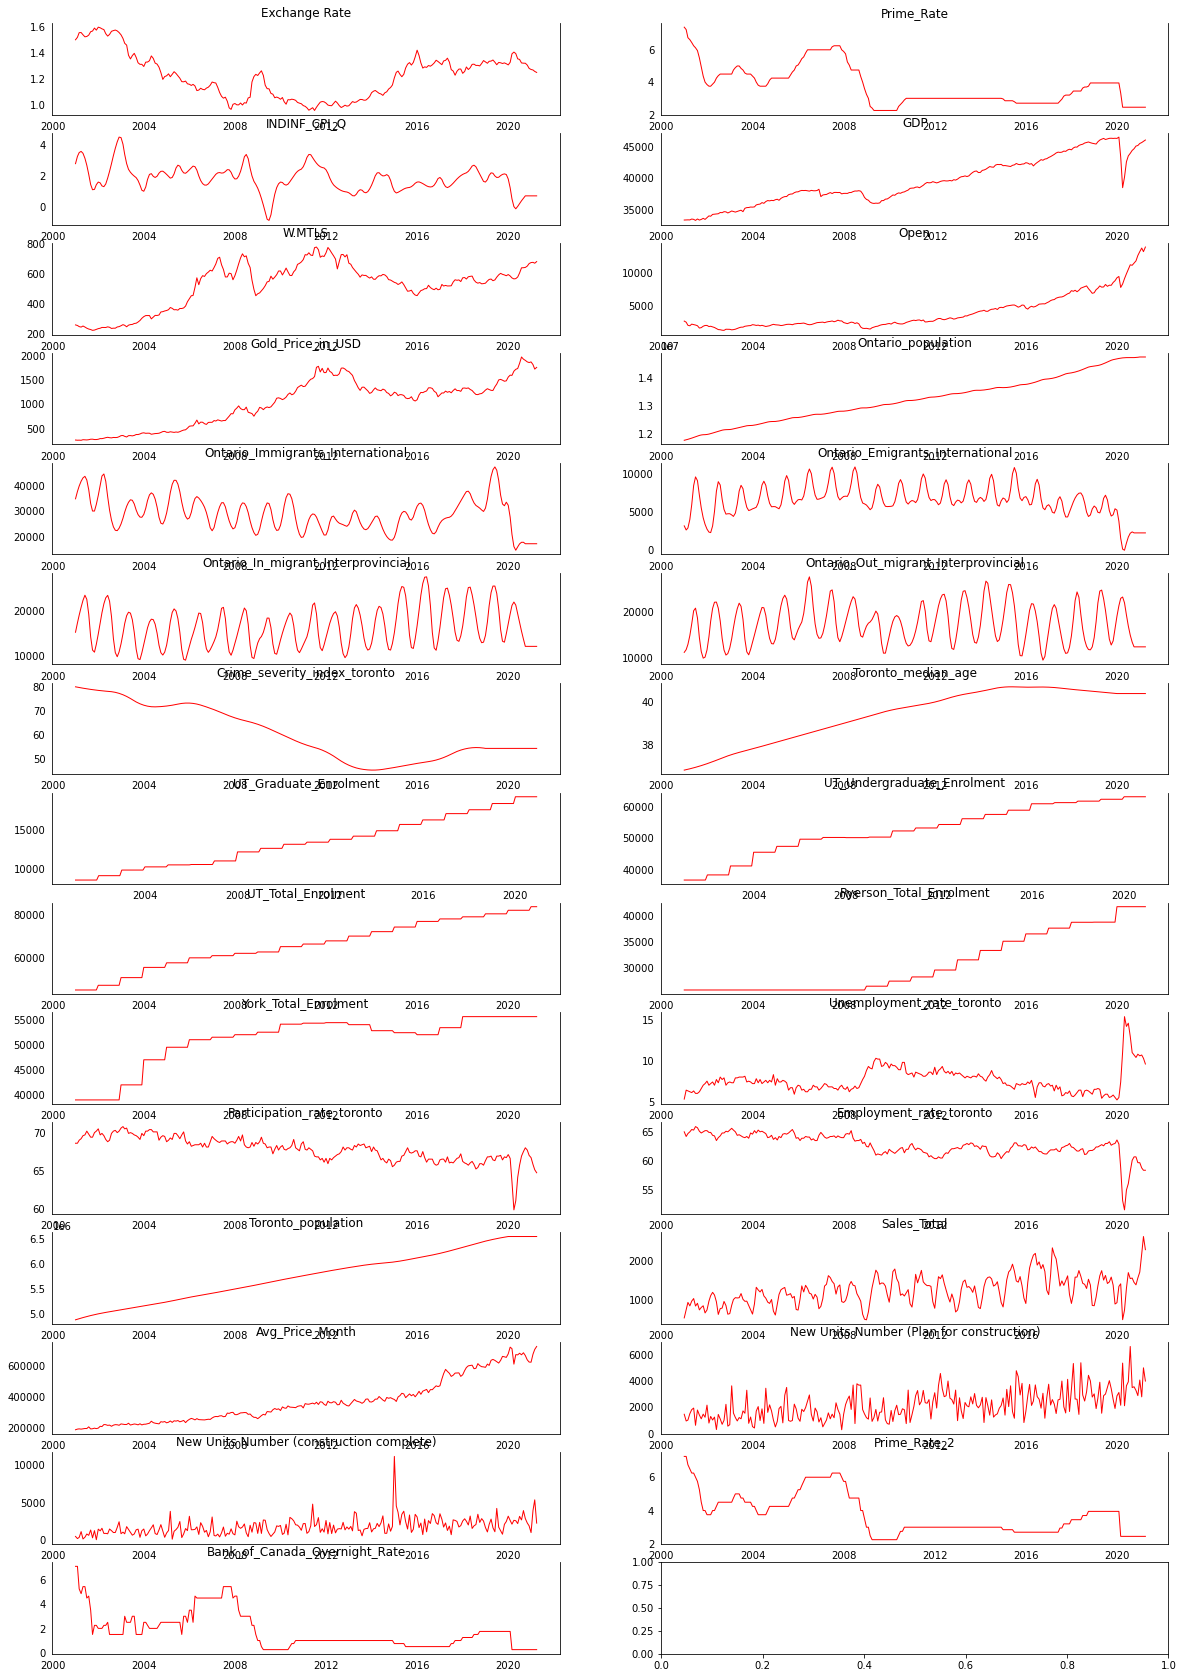

In [4]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [5]:
for col in df.columns:
    if "Change_Rate" in col:
        df.drop(columns=[col], inplace=True)

In [6]:
df = df[['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)']]

In [7]:
df.dropna(inplace=True)

In [8]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261.0,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261.0,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261.0,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261.0,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261.0,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,1.281517,2.450,0.700000,45143.29965,669.8060,12605.309530,1852.895217,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311.0,67.0,59.7,6555205.000,1551.0,625828.1154,2876.0,1903.0
2021-01-01,1.273017,2.450,0.700000,45461.59117,676.4900,13195.814200,1865.722381,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,83970.0,66.7,59.7,6555205.000,1703.0,624885.6230,4063.0,1018.0
2021-02-01,1.269159,2.450,0.700000,45606.79326,678.0100,13733.605730,1810.338000,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,83970.0,65.8,58.8,6555205.000,2167.0,676837.4998,2783.0,3929.0


In [9]:
df["Date"] = df.index
df["Month"] = df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
df["Month"] = df["Month"].astype("float64")
df.drop(columns=["Date"], inplace=True)

In [10]:
# ['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
#        'Gold_Price_in_USD', 'Ontario_Immigrants_International',
#        'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
#        'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
#        'Toronto_median_age', 'UT_Total_Enrolment',
#        'Participation_rate_toronto', 'Employment_rate_toronto',
#        'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
#        'New Units Number (Plan for construction)',
#        'New Units Number (construction complete)', 'Month']

In [11]:
df.columns

Index(['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

In [12]:
df.drop(columns=["Exchange Rate", "Gold_Price_in_USD", "Ontario_Emigrants_International", "Ontario_Emigrants_International", 
                 "Ontario_In_migrant_Interprovincial", 'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto'], inplace = True)

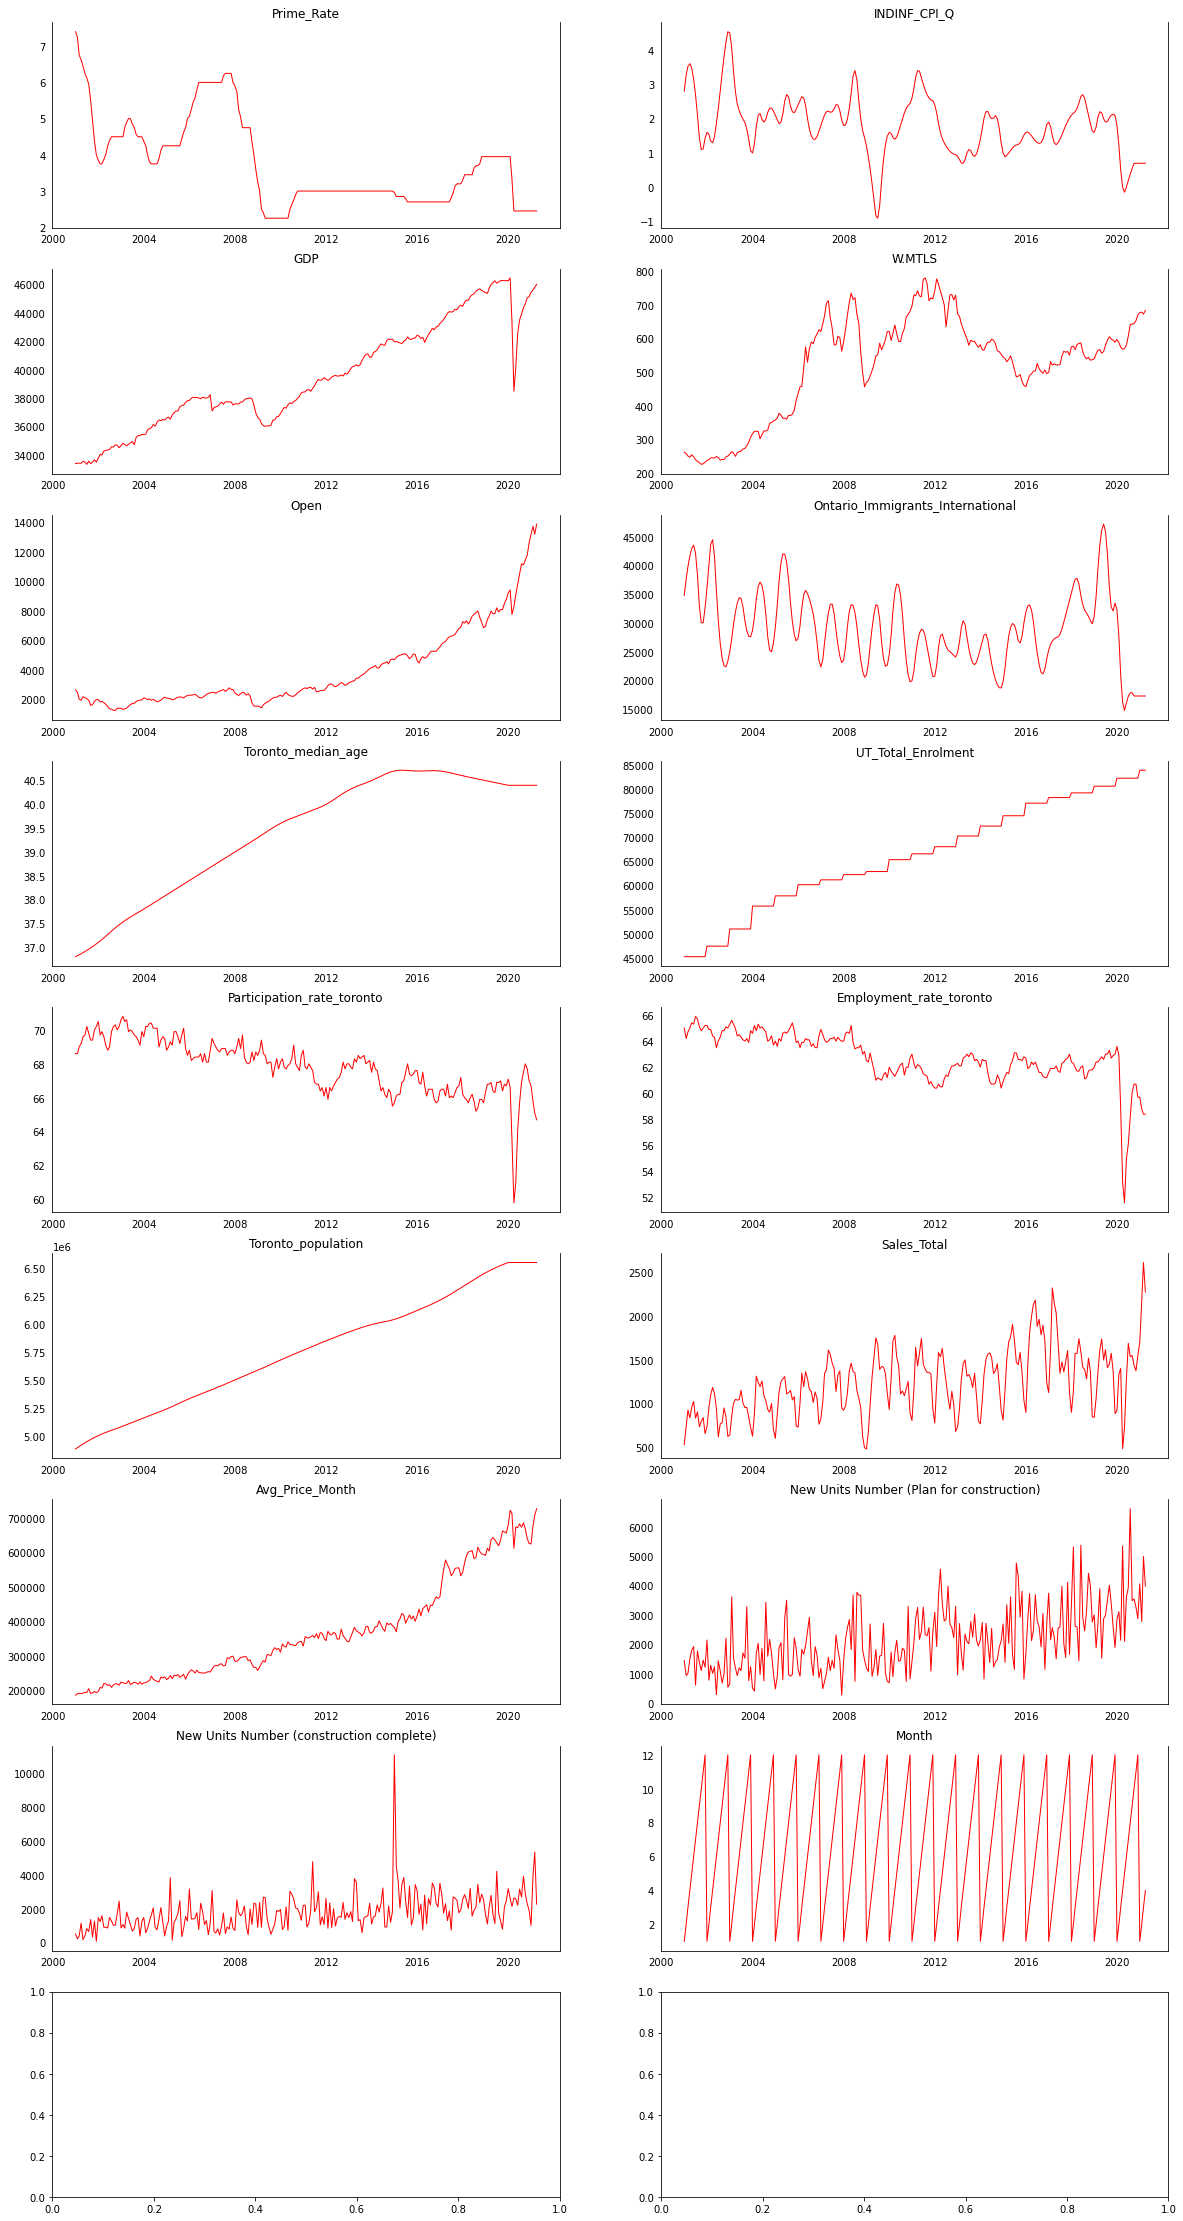

In [13]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
    
except:
    pass


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
df_target = pd.DataFrame()
df_target["Avg_Price_Month"] = df["Avg_Price_Month"]
df.drop(columns = ["Avg_Price_Month"], inplace=True)

In [16]:
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:5])

[[ 3.0314394   1.16141195 -1.64302143 -1.72949598 -0.48435472  0.89824492
  -2.14391064 -1.92167085  0.46954691  1.19741927 -1.78398906 -1.91715057
  -0.63980796 -1.15942046 -1.5687969 ]
 [ 2.90650162  1.71450323 -1.63742363 -1.75575093 -0.54628105  1.33824652
  -2.12745465 -1.92167085  0.46954691  0.78210967 -1.75947619 -1.36976402
  -1.10280166 -1.41565529 -1.28011934]
 [ 2.49004236  2.00473664 -1.63565244 -1.80551314 -0.72272853  1.66651219
  -2.11189626 -1.92167085  0.72162489  1.04167817 -1.73794623 -0.85189341
  -1.04028392 -1.27129764 -0.99144178]
 [ 2.38592754  2.09430506 -1.63813987 -1.82686365 -0.74862531  1.95338457
  -2.09390151 -1.92167085  0.84766388  1.19741927 -1.7147856  -1.09070421
  -0.59812946 -0.58198985 -0.70276422]
 [ 2.2401668   1.94909603 -1.60083781 -1.77877409 -0.65615956  2.15439652
  -2.07571743 -1.92167085  1.09974187  1.40507407 -1.69304857 -0.76334559
  -0.31997082 -1.46257153 -0.41408666]]


In [17]:
pca = PCA(n_components=8)

In [18]:
df_pca = pca.fit_transform(df_scaled)

In [19]:
df_pca_fit = pd.DataFrame(data = df_pca)
df_pca_fit.head()

,0,1,2,3,4,5,6,7
0,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713
1,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008
2,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727
3,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201
4,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568


In [20]:
pca.explained_variance_ratio_

array([0.53316507, 0.09663677, 0.07166296, 0.05725705, 0.0547087 ,
       0.04624262, 0.03973268, 0.03041986])

In [21]:
df_target["Avg_Price_Month"]

Date
2001-01-01    185757.6686
2001-02-01    189990.7036
2001-03-01    191476.2205
2001-04-01    189802.6914
2001-05-01    191658.3372
                 ...     
2020-12-01    625828.1154
2021-01-01    624885.6230
2021-02-01    676837.4998
2021-03-01    707835.1083
2021-04-01    727137.3430
Name: Avg_Price_Month, Length: 244, dtype: float64

In [22]:
df_pca_fit.index = df_target.index

In [23]:
df_pca_fit["Avg_Price_Month"] = df_target["Avg_Price_Month"]

In [24]:
df_pca_fit

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,185757.6686
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,189990.7036
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,191476.2205
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,189802.6914
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,191658.3372
...,...,...,...,...,...,...,...,...,...
2020-12-01,4.666611,1.089440,-1.454996,-0.783678,0.873000,0.477821,-0.483692,0.204829,625828.1154
2021-01-01,5.047221,-0.267351,0.585901,-0.244710,-0.164934,2.237588,0.210739,0.315483,624885.6230
2021-02-01,5.923070,-0.297703,1.379302,0.202430,0.536660,0.006413,-0.094186,0.940661,676837.4998


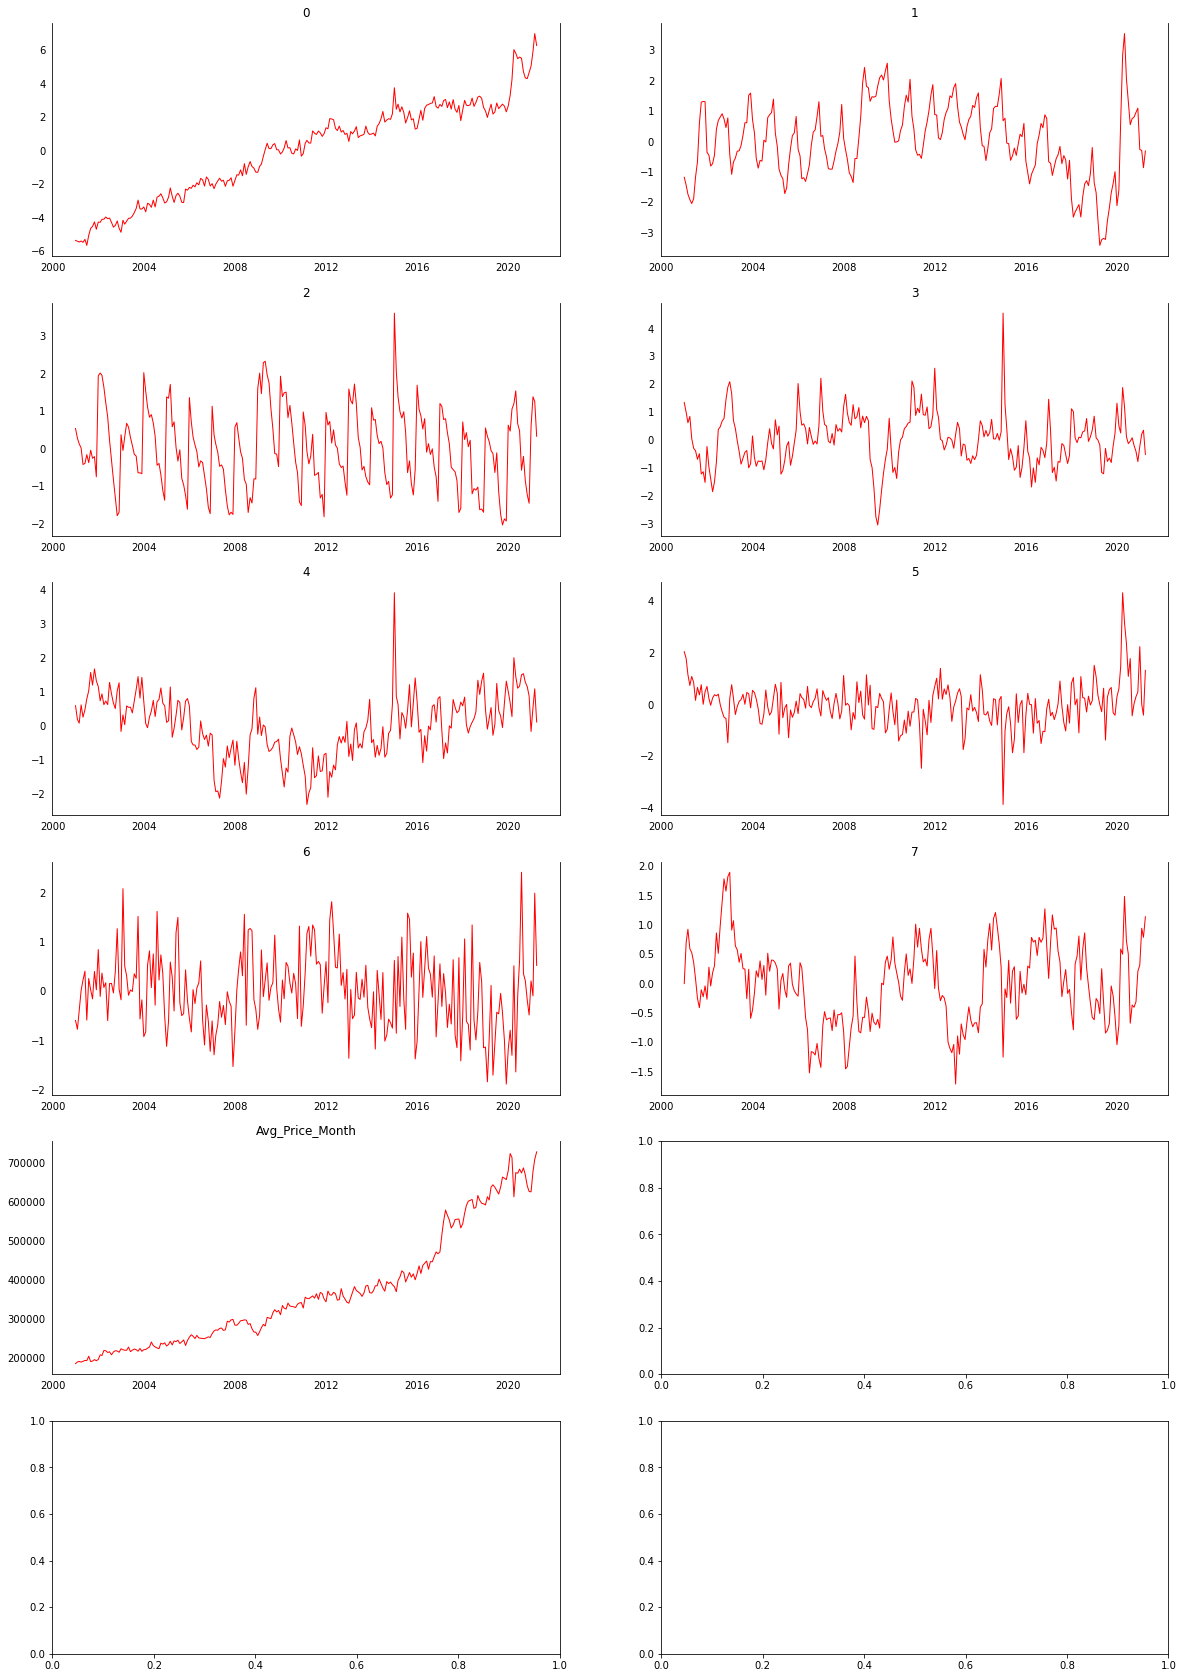

In [25]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df_pca_fit[df_pca_fit.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df_pca_fit.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [26]:
df = df_pca_fit.copy()

In [27]:
df["Avg_Price_Month"] = df["Avg_Price_Month"]/100000

In [28]:
df

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,1.857577
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,1.899907
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,1.914762
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,1.898027
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,1.916583
...,...,...,...,...,...,...,...,...,...
2020-12-01,4.666611,1.089440,-1.454996,-0.783678,0.873000,0.477821,-0.483692,0.204829,6.258281
2021-01-01,5.047221,-0.267351,0.585901,-0.244710,-0.164934,2.237588,0.210739,0.315483,6.248856
2021-02-01,5.923070,-0.297703,1.379302,0.202430,0.536660,0.006413,-0.094186,0.940661,6.768375


In [29]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,Avg_Price_Month_x
0_y,1.0000,0.0000,0.0011,0.0138,0.0000,0.0028,0.0000,0.0000,0.0030
1_y,0.0000,1.0000,0.0000,0.0000,0.0119,0.1540,0.0000,0.0014,0.0002
2_y,0.0005,0.0000,1.0000,0.0000,0.0000,0.0000,0.0150,0.0059,0.0107
3_y,0.0000,0.0000,0.0000,1.0000,0.0112,0.0100,0.0009,0.0309,0.0097
4_y,0.0681,0.0000,0.0000,0.0000,1.0000,0.0000,0.0326,0.0001,0.0416
5_y,0.1294,0.0000,0.0014,0.0040,0.0006,1.0000,0.0001,0.4488,0.0001
6_y,0.1194,0.0000,0.0001,0.0035,0.0001,0.2918,1.0000,0.0000,0.0497
7_y,0.0000,0.0271,0.0035,0.0000,0.0021,0.1740,0.0000,1.0000,0.1447
Avg_Price_Month_y,0.0120,0.0000,0.0000,0.0020,0.0583,0.0006,0.0243,0.3021,1.0000


In [30]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
0      ::  328.57    > 179.5199  =>   True
1      ::  218.91    > 143.6691  =>   True
2      ::  157.37    > 111.7797  =>   True
3      ::  106.05    > 83.9383   =>   True
4      ::  73.24     > 60.0627   =>   True
5      ::  44.0      > 40.1749   =>   True
6      ::  19.83     > 24.2761   =>   False
7      ::  4.88      > 12.3212   =>   False
Avg_Price_Month ::  0.06      > 4.1296    =>   False


In [31]:
nobs = 50+4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(190, 9)
(54, 9)


In [32]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [33]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9509
 No. Lags Chosen       = 2
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.7708. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3904
 No. Lags Chosen       = 15
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.1445. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-

In [34]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [35]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.6388
 No. Lags Chosen       = 1
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2219
 No. Lags Chosen       = 14
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0006. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [36]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [37]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1869
 No. Lags Chosen       = 7
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.2945
 No. Lags Chosen       = 15
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test St

In [38]:
df_differenced

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-03-01,-0.000960,-0.034133,0.107182,-0.022306,0.299873,-0.355718,0.561897,-0.482003,-0.027475
2001-04-01,0.107518,0.116623,0.039153,0.600227,0.641754,0.203257,0.020697,-0.554245,-0.031590
2001-05-01,-0.136391,0.046170,-0.328325,-1.014539,-0.896405,0.768105,-0.194817,0.268893,0.035292
2001-06-01,0.255053,0.289764,0.467168,0.433563,0.576950,-0.575395,-0.028116,-0.102090,0.003864
2001-07-01,-0.537915,0.549014,0.206041,0.266817,0.102109,-0.470565,-1.178056,-0.113820,-0.026289
...,...,...,...,...,...,...,...,...,...
2016-06-01,-0.508213,0.010023,-1.167117,-1.203872,-1.237881,2.445047,0.074336,0.108699,-0.004942
2016-07-01,-0.168417,0.536690,1.115804,1.399211,1.182665,-2.299483,-1.300073,-0.291395,-0.264090
2016-08-01,0.043199,-0.402850,-0.510283,-1.131922,-0.842090,1.063723,0.520791,0.569808,0.404653


In [39]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -19.120899363569837
BIC :  -17.565820350110407
FPE :  4.969332841296419e-09
HQIC:  -18.490780748148048 

Lag Order = 2
AIC :  -20.54345268795645
BIC :  -17.577846875026573
FPE :  1.2047221652079236e-09
HQIC:  -19.341676287086862 

Lag Order = 3
AIC :  -21.12060798381221
BIC :  -16.733961130192007
FPE :  6.864312338794206e-10
HQIC:  -19.34280774106208 

Lag Order = 4
AIC :  -21.34904580696252
BIC :  -15.530710984767996
FPE :  5.622694167317912e-10
HQIC:  -18.990802173498004 

Lag Order = 5
AIC :  -21.687891290529492
BIC :  -14.427086551314474
FPE :  4.2082175574402535e-10
HQIC:  -18.74473034346593 

Lag Order = 6
AIC :  -21.935915630202118
BIC :  -13.221721618647097
FPE :  3.5439160773864613e-10
HQIC:  -18.40330817316412 

Lag Order = 7
AIC :  -22.349237887751627
BIC :  -12.170595401513417
FPE :  2.621457969573728e-10
HQIC:  -18.22259853323571 



C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
x = model.select_order(maxlags=17)
x.summary()

,AIC,BIC,FPE,HQIC
0,-16.07,-15.91,1.044e-07,-16.01
1,-19.08,-17.42,5.201e-09,-18.40
2,-20.56,-17.42,1.184e-09,-19.29
3,-21.19,-16.56,6.469e-10,-19.31
4,-21.40,-15.28,5.399e-10,-18.92
5,-21.81,-14.21,3.802e-10,-18.73
6,-22.04,-12.95,3.309e-10,-18.35
7,-22.57,-11.98,2.235e-10,-18.27
8,-22.79,-10.72,2.148e-10,-17.89
9,-23.10,-9.542,2.006e-10,-17.60


In [41]:
# 14
# 15
# 17
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 05, Jun, 2021
Time:                     22:14:34
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -12.0856
Nobs:                     173.000    HQIC:                  -25.3445
Log likelihood:           1989.93    FPE:                1.63162e-13
AIC:                     -34.3956    Det(Omega_mle):     8.81878e-16
--------------------------------------------------------------------
Results for equation 0
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.003415         0.025792           -0.132           0.895
L1.0                       -0.768000         0.749519           -1.025           0.306
L1.1                        1.400972    

In [42]:
def adjust(val, length= 6): return str(val).ljust(length)

In [43]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

0      : 2.02
1      : 2.18
2      : 1.87
3      : 1.95
4      : 2.02
5      : 1.89
6      : 2.22
7      : 2.12
Avg_Price_Month : 2.09


In [44]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

15


array([[ 9.54709374e-01, -4.89382482e-01, -5.14102938e-01,
         5.97786646e-01,  8.66426686e-01,  1.23574777e+00,
         2.98498321e+00, -9.72649152e-01,  3.61785081e-01],
       [ 8.23420947e-02,  6.12928764e-01,  1.38385255e+00,
         6.66457886e-01,  2.15462779e-01, -2.87390140e+00,
        -2.49219451e+00,  9.52670156e-01, -6.75526000e-04],
       [-9.44495603e-01, -5.28898692e-02, -9.22730593e-01,
        -1.92381408e+00, -1.98427946e+00,  1.80789452e+00,
        -1.04986415e+00,  7.04220159e-01, -2.38263759e-01],
       [ 6.04571630e-01, -4.06595612e-01,  3.07815737e-01,
         1.51240961e+00,  1.93369922e+00, -5.31430092e-01,
         1.66627417e+00, -1.13133106e+00,  2.03341030e-01],
       [-6.79502575e-01,  5.22071590e-01,  9.79284573e-01,
         3.31216922e-01,  4.23028651e-02, -2.19220310e+00,
        -2.64475854e+00,  5.22253683e-01, -2.37516786e-01],
       [ 6.51947116e-01, -1.67078987e+00,  1.56313297e+00,
         2.76834318e-01, -1.42803313e+00,  3.478757

In [45]:
col_list = list()
for col in df.columns:
    col_list.append(str(col))
df.columns = col_list 

In [46]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d
Date,,,,,,,,,
2016-11-01,-1.210798,0.250274,0.303088,-0.450398,-0.425847,-0.868574,-1.787354,0.208398,-0.295274
2016-12-01,0.782173,0.096889,0.437004,0.992298,1.018055,-0.335904,0.587674,-0.719257,0.332758
2017-01-01,-0.032274,-1.202036,1.424082,-0.975298,-2.563400,4.367316,-0.202448,0.733127,-0.182974
2017-02-01,0.651217,0.298947,-1.049526,-0.067080,2.791896,-5.405943,2.058303,-1.138475,0.180952
2017-03-01,-0.139431,0.388022,-0.543773,0.007373,-0.035605,1.850931,-0.299780,-0.007871,-0.149590
2017-04-01,-1.195069,0.579155,-0.069935,-1.133575,-1.633065,-0.185292,-2.673149,1.400411,-0.094281
2017-05-01,0.672105,-0.301321,0.657464,2.422300,2.299450,-1.920625,1.212226,-0.648066,0.002788
2017-06-01,-0.349714,0.018715,-2.572172,-2.062138,-3.121815,5.437227,0.765968,0.378393,0.302264
2017-07-01,0.291388,-0.175549,1.849556,1.798364,2.142803,-4.731575,-0.095998,-0.602650,-0.122892


In [47]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [48]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d,0_1d,...,4_1d,4_forecast,5_1d,5_forecast,6_1d,6_forecast,7_1d,7_forecast,Avg_Price_Month_1d,Avg_Price_Month_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-01,-1.210798,0.250274,0.303088,-0.450398,-0.425847,-0.868574,-1.787354,0.208398,-0.295274,-0.828928,...,-0.380690,0.238560,-0.394202,-1.436483,-0.949105,-0.229915,0.278313,1.050943,-0.166224,4.425765
2016-12-01,0.782173,0.096889,0.437004,0.992298,1.018055,-0.335904,0.587674,-0.719257,0.332758,-0.046755,...,0.637365,0.875925,-0.730106,-2.166589,-0.361431,-0.591346,-0.440944,0.609999,0.166534,4.592299
2017-01-01,-0.032274,-1.202036,1.424082,-0.975298,-2.563400,4.367316,-0.202448,0.733127,-0.182974,-0.079029,...,-1.926035,-1.050111,3.637210,1.470621,-0.563879,-1.155224,0.292183,0.902181,-0.016439,4.575860
2017-02-01,0.651217,0.298947,-1.049526,-0.067080,2.791896,-5.405943,2.058303,-1.138475,0.180952,0.572188,...,0.865861,-0.184250,-1.768733,-0.298112,1.494425,0.339200,-0.846292,0.055889,0.164513,4.740373
2017-03-01,-0.139431,0.388022,-0.543773,0.007373,-0.035605,1.850931,-0.299780,-0.007871,-0.149590,0.432757,...,0.830256,0.646006,0.082199,-0.215913,1.194644,1.533845,-0.854163,-0.798273,0.014923,4.755296
2017-04-01,-1.195069,0.579155,-0.069935,-1.133575,-1.633065,-0.185292,-2.673149,1.400411,-0.094281,-0.762312,...,-0.802809,-0.156803,-0.103093,-0.319006,-1.478504,0.055340,0.546249,-0.252025,-0.079359,4.675937
2017-05-01,0.672105,-0.301321,0.657464,2.422300,2.299450,-1.920625,1.212226,-0.648066,0.002788,-0.090208,...,1.496641,1.339838,-2.023718,-2.342724,-0.266278,-0.210938,-0.101817,-0.353842,-0.076571,4.599366
2017-06-01,-0.349714,0.018715,-2.572172,-2.062138,-3.121815,5.437227,0.765968,0.378393,0.302264,-0.439922,...,-1.625174,-0.285337,3.413509,1.070785,0.499690,0.288752,0.276576,-0.077266,0.225694,4.825060
2017-07-01,0.291388,-0.175549,1.849556,1.798364,2.142803,-4.731575,-0.095998,-0.602650,-0.122892,-0.148534,...,0.517628,0.232291,-1.318066,-0.247281,0.403692,0.692445,-0.326074,-0.403340,0.102802,4.927861


In [49]:
col_list = list()
for col in df_test.columns:
    col_list.append(str(col))
df_test.columns = col_list 

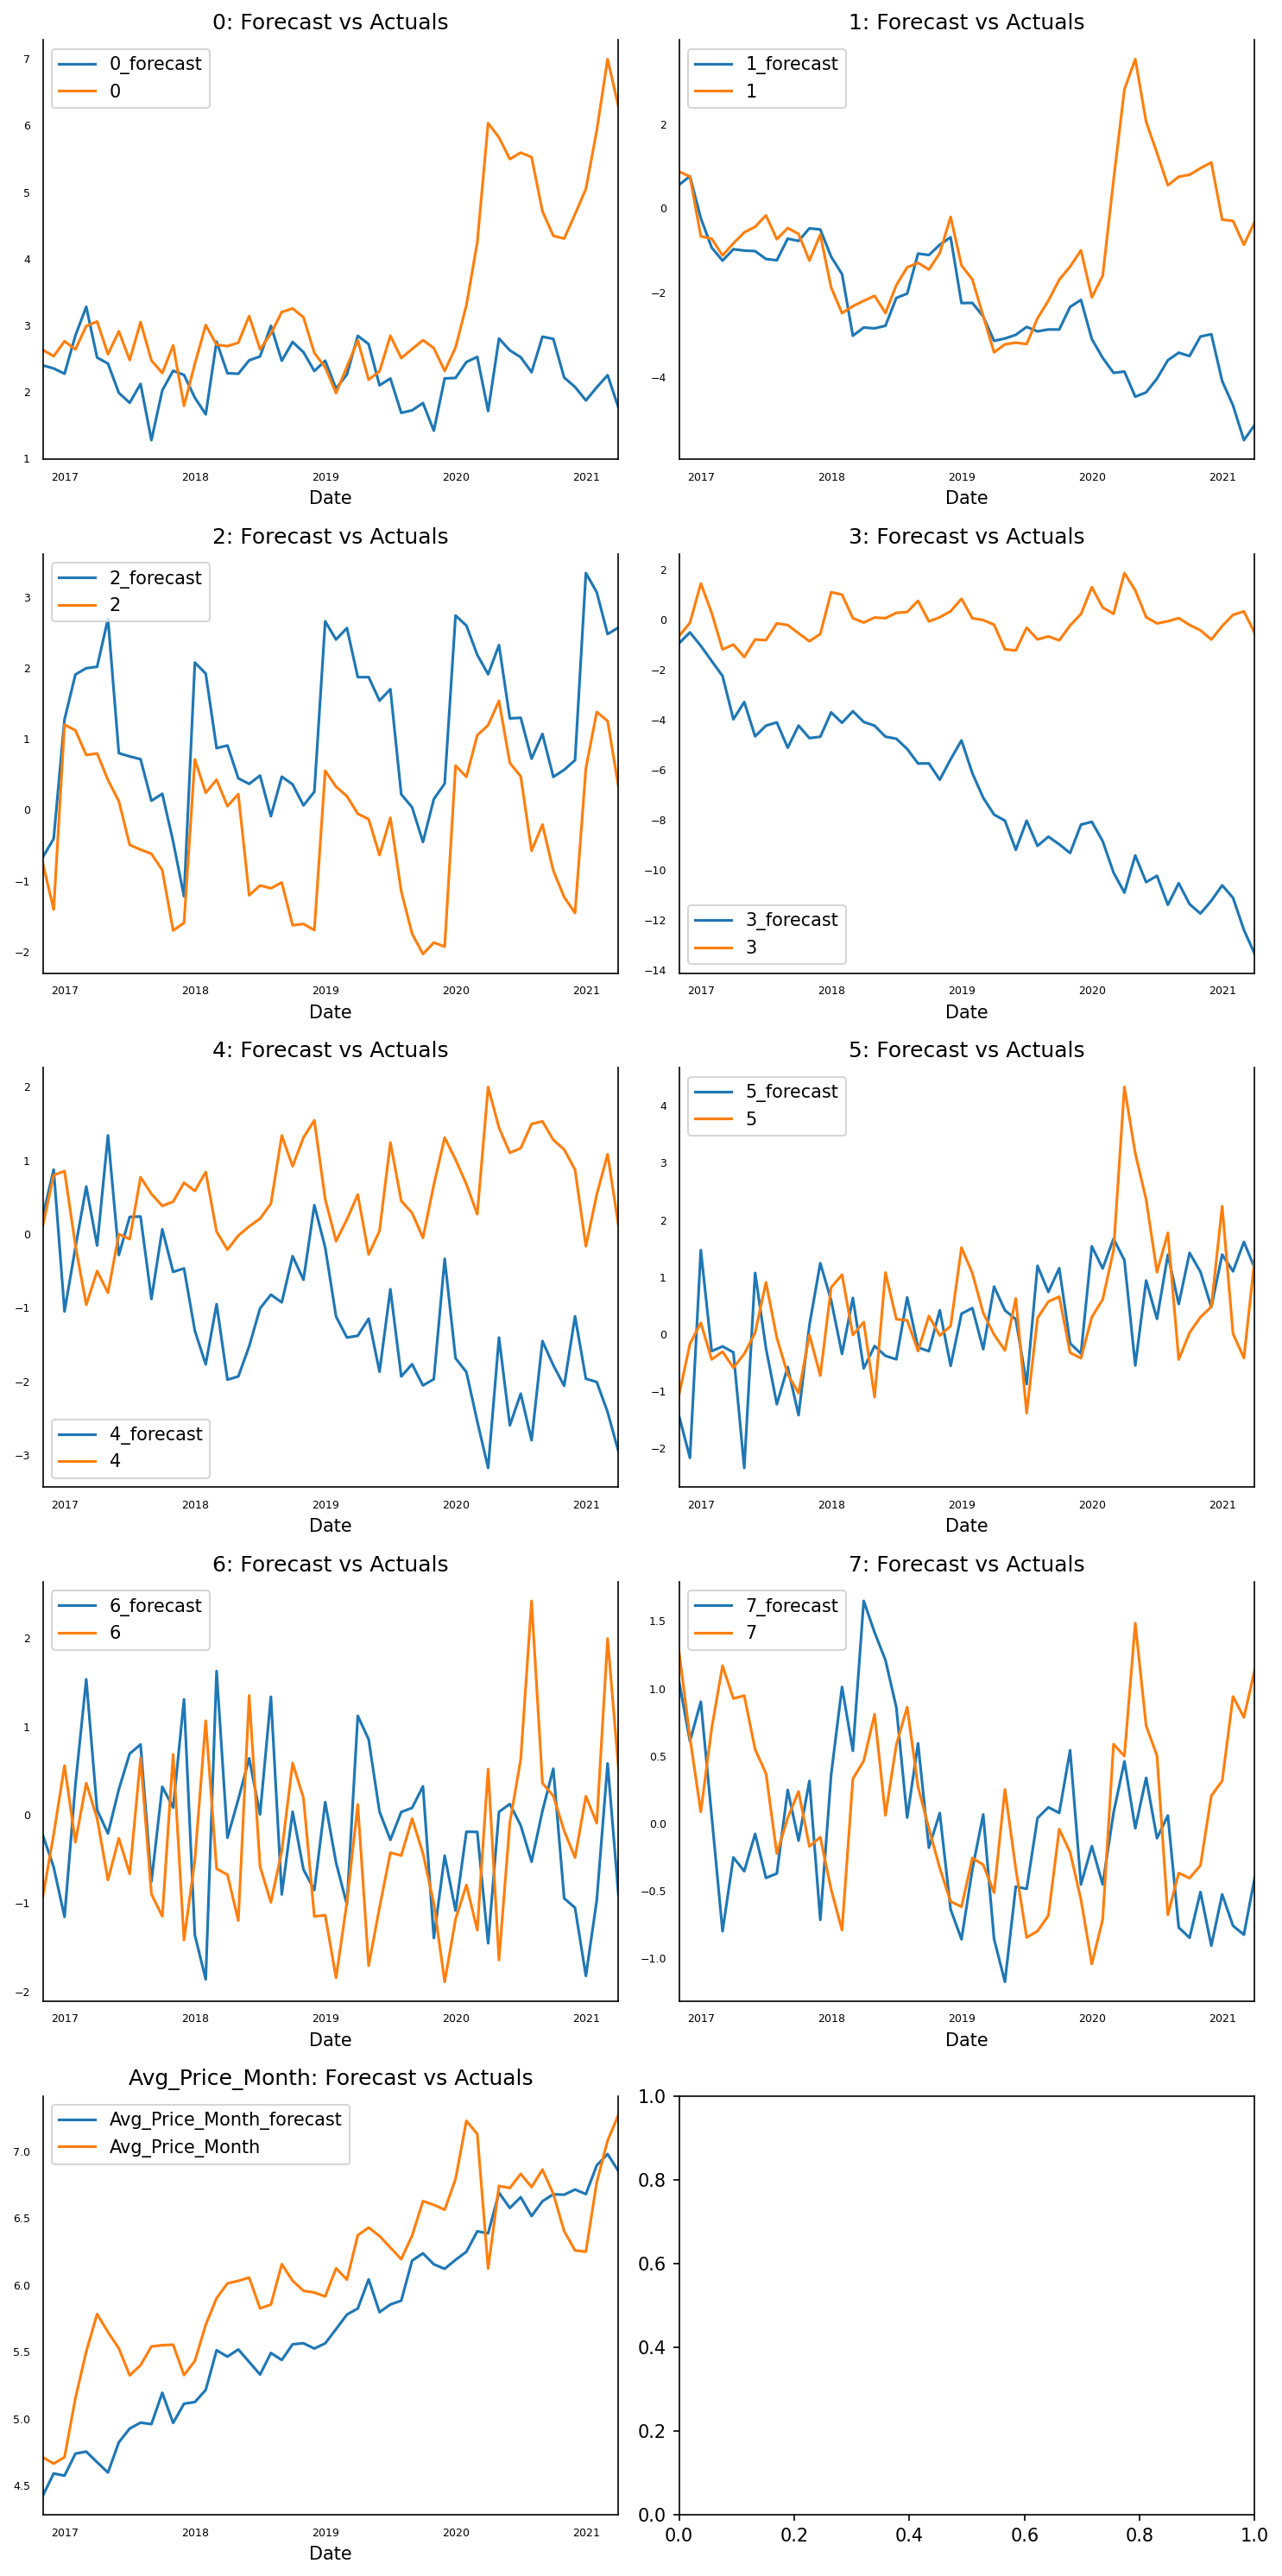

In [50]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,20))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [51]:
df_results['Avg_Price_Month_forecast']

Date
2016-11-01    4.425765
2016-12-01    4.592299
2017-01-01    4.575860
2017-02-01    4.740373
2017-03-01    4.755296
2017-04-01    4.675937
2017-05-01    4.599366
2017-06-01    4.825060
2017-07-01    4.927861
2017-08-01    4.971682
2017-09-01    4.960766
2017-10-01    5.194845
2017-11-01    4.969525
2017-12-01    5.113055
2018-01-01    5.125767
2018-02-01    5.216090
2018-03-01    5.512331
2018-04-01    5.464789
2018-05-01    5.518713
2018-06-01    5.425529
2018-07-01    5.330901
2018-08-01    5.492247
2018-09-01    5.439726
2018-10-01    5.557170
2018-11-01    5.564966
2018-12-01    5.525346
2019-01-01    5.564354
2019-02-01    5.670533
2019-03-01    5.779116
2019-04-01    5.824529
2019-05-01    6.042134
2019-06-01    5.797130
2019-07-01    5.854613
2019-08-01    5.882925
2019-09-01    6.182280
2019-10-01    6.236506
2019-11-01    6.154433
2019-12-01    6.121018
2020-01-01    6.187750
2020-02-01    6.248385
2020-03-01    6.401094
2020-04-01    6.385559
2020-05-01    6.689642
2020-0

In [52]:
df_test.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', 'Avg_Price_Month'], dtype='object')

In [53]:
df_final = df_results[['Avg_Price_Month_forecast']].join(df_test[["Avg_Price_Month"]])

In [54]:
df_final

,Avg_Price_Month_forecast,Avg_Price_Month
Date,,
2016-11-01,4.425765,4.712558
2016-12-01,4.592299,4.665917
2017-01-01,4.575860,4.714093
2017-02-01,4.740373,5.154241
2017-03-01,4.755296,5.502994
2017-04-01,4.675937,5.782796
2017-05-01,4.599366,5.648075
2017-06-01,4.825060,5.526791
2017-07-01,4.927861,5.325020


In [55]:
df_test["Avg_Price_Month"]

Date
2016-11-01    4.712558
2016-12-01    4.665917
2017-01-01    4.714093
2017-02-01    5.154241
2017-03-01    5.502994
2017-04-01    5.782796
2017-05-01    5.648075
2017-06-01    5.526791
2017-07-01    5.325020
2017-08-01    5.401688
2017-09-01    5.540690
2017-10-01    5.550040
2017-11-01    5.553957
2017-12-01    5.327003
2018-01-01    5.432786
2018-02-01    5.702751
2018-03-01    5.901840
2018-04-01    6.012109
2018-05-01    6.030819
2018-06-01    6.055297
2018-07-01    5.825474
2018-08-01    5.853556
2018-09-01    6.155817
2018-10-01    6.031533
2018-11-01    5.956774
2018-12-01    5.943815
2019-01-01    5.914439
2019-02-01    6.124885
2019-03-01    6.039691
2019-04-01    6.371804
2019-05-01    6.428907
2019-06-01    6.366065
2019-07-01    6.279269
2019-08-01    6.193065
2019-09-01    6.368175
2019-10-01    6.626311
2019-11-01    6.598553
2019-12-01    6.562325
2020-01-01    6.791822
2020-02-01    7.226747
2020-03-01    7.127458
2020-04-01    6.123005
2020-05-01    6.740281
2020-0